In [6]:
from math import sqrt, acos, pi
import numpy as np

# Fungsi untuk mencari sudut
def angle(p1,pcheck,p2):
    x1, x2, x3 = p1[0], p2[0], pcheck[0]
    y1, y2, y3 = p1[1], p2[1], pcheck[1]
    # Mencari vektor AB dan BC   
    AB = [x3-x1,y3-y1]
    BC = [x2-x3,y2-x2]
    # Mencari ||AB|| dan ||BC||
    nomAB = sqrt(AB[0]*AB[0]+AB[1]*AB[1])
    nomBC = sqrt(BC[0]*BC[0]+BC[1]*BC[1])
    # Mencegah perhitungan n/0
    if (nomAB != 0 and nomBC != 0):
        # Mencari sudut dari rumus sudut = arc_cos(AB.BC/(||AB||*||BC||))
        valuecos = (AB[0]*BC[0] + AB[1]*BC[1])/(nomAB*nomBC)
        return acos(valuecos)*180/pi
    return 0

# Fungsi untuk mencari distance
def distance(p1,pcheck,p2):
    x1, x2, x3 = p1[0], p2[0], pcheck[0]
    y1, y2, y3 = p1[1], p2[1], pcheck[1]
    #Mencari persamaan ax + by + c = 0
    a, b, c = -(y2-y1), (x2-x1), -(x2-x1)*y1 + (y2-y1)*x1
    # Rumus mencari distance dari persamaan garis ax + by + c = 0 
    # Distance = abs(a*x + b*y + c)/sqrt(a*a + b*b)
    return abs(a*x3 + b*y3 + c)/sqrt(a*a + b*b)
   
# Fungsi untuk membagi bagian S menjadi S1 dan S2 berdasarkan garis p1p2
def divide(S,p1,p2):
    S1 = [] #sebelah atas
    S2 = [] #sebelah bawah
    x1, y1, x2, y2 = p1[0], p1[1], p2[0], p2[1]
    # p1 dan p2 menunjuk titik yang sama
    if (p1[0] == p2[0] and p1[1] == p2[1]): 
        return S1, S2
    # Membagi bagian S dengan memanfaatkan determinan :
    # |x1 y1 1|
    # |x2 y2 1|
    # |x3 y3 1|     
    for point in S:
        x3, y3 = point[0],point[1]
        det = x1*y2 + x3*y1 + x2*y3 - x3*y2 - x2*y1 - x1*y3
        # Determinan positif berarti titik berada di atas garis p1p2 (S1)
        if (det > 0):
            S1.append(point)
        # Determinan negatif berarti titik berada di bawah garis p1p2 (S2)
        elif (det < 0):
            S2.append(point)
        # Determinan nol berarti titik berada di garis p1p2 (tidak masuk S1 atau pun S2)
    return S1, S2

# Fungsi rekursif convexhull (Algoritma quickhull)
def quickhull(S,p1,p2,above):
    convex_hull = []
    # Apabila S kosong (tidak ada titik lain selain S)
    # p1 dan p2 menjadi bentuk convexhull
    if (S == []):
        convex_hull.append([p1.tolist(),p2.tolist()])
        return convex_hull
    # Mencari jarak terjauh dari garis p1p2
    far_point = S[0]
    far_distance = distance(p1,far_point,p2)
    far_angle = angle(p1,far_point,p2) 
    n = 0 
    for i, point in enumerate(S):
        temp_dist = distance(p1,point,p2)
        if (far_distance < temp_dist):
            far_point, far_distance, n = point, temp_dist, i
        # Apabila ada dua titik yang memiliki jarak yang sama
        # Mencari titik yang menghasilkan sudut terbesar
        elif (far_distance == temp_dist):
            temp_angle = angle(p1,point,p2)
            if (far_angle < temp_angle):
                far_point, far_distance, far_angle, n = point, temp_dist, temp_angle, i

    # Menghapus titik terjauh dari S 
    S.pop(n)

    # Membagi S1 menjadi S11 (atas S1) dan S12 (bawah S1) berdasarkan garis p1far_point
    S11, S12 = divide(S,p1,far_point)
    # Membagi S2 menjadi S21 (atas S2) dan S22 (bawah S2) berdasarkan garis far_pointp2
    S21, S22 = divide(S,far_point,p2)

    # Lakukan rekursif untuk mengecek bagian yang sama
    if (above):
        # Bagian atas (S1) hanya melakukan pengecekan bagian atas saja (S11, S21) 
        convex_hull += quickhull(S11,p1,far_point,True)
        convex_hull += quickhull(S21,far_point,p2,True)
    elif (not above) :
        # Bagian atas (S2) hanya melakukan pengecekan bagian atas saja (S12, S22) 
        convex_hull += quickhull(S12,p1,far_point,False)
        convex_hull += quickhull(S22,far_point,p2,False)
    return convex_hull

# Fungsi mencari convexhull
def myConvexHull(bucket):
    convex_hull = []
    index_convex_hull = []
    # Melakukan sorting dengan key data di x kemudian di y untuk mencari p1 dan p2 (titik terjauh)
    # Perkiraan komplesitas O(log n)/ quicksort
    sort = sorted(bucket,key=lambda x:(x[0],x[1]))

    # Menghapus titik-titik terjauh
    p1 = sort.pop(0)
    p2 = sort.pop(-1)

    # Membagi S menjadi S1 (atas S) dan S2 (bawah S) berdasarkan garis p1p2
    S1, S2 = divide(sort,p1,p2)

    # Rekursif convexhull bagian atas (S1)
    convex_hull += quickhull(S1,p1,p2,True)
    # Rekursif convexhull bagian atas (S1)
    convex_hull += quickhull(S2,p1,p2,False)

    # Melakukan searching terhadap index dari titik convexhull yang terbentuk
    for hasil in convex_hull:
        for i, content in enumerate(bucket):
            if (content.tolist() == hasil[0]):
                break
        for j, content in enumerate(bucket):
            if (content.tolist() == hasil[1]):
                break
        index_convex_hull.append([i,j])

    # Mengubah list menjadi nparray
    if (index_convex_hull != []):
        index_convex_hull = np.vstack(index_convex_hull)

    return index_convex_hull

In [7]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_iris, load_wine, load_breast_cancer
from ConvexHull import myConvexHull
from time import sleep

def main():
    while True:
        print("Pilihan Database : ")
        print("1. Database Iris")
        print("2. Database Wine")
        print("3. Database Breast Cancer")
        print("4. Database Digits")
        print("5. Keluar")
        print("===================================")
        sleep(0.1)
        # Memilih database yang ingin dibuat convexhullnya
        choices = int(input("Masukan dataset (1/2/3/4) : "))

        if (choices < 1 or choices > 4):
            break

        # Melakukan load database yang dipilih
        match choices:

            case 1:
                print("Pilihan Kolom : ")
                print("1. Sepal-length vs Sepal-width")
                print("2. Petal-length vs Petal-width")
                data = load_iris()
                sleep(0.1)
                coulom = int(input("Masukan kolom data (1/2) : "))
                if (coulom == 1):
                    n, m = 0, 1
                elif (coulom == 2):
                    n, m = 2,3
                    
            case 2:
                data = load_wine()
                n = int(input("Masukan kolom1 data (0-12) : "))
                while True:
                    m = int(input("Masukan kolom2 data (0-12) excepet " + str(n) + ") : "))
                    if (n != m):
                        break
                        
            case 3:
                data = load_breast_cancer()
                n, m = 0, 1
                n = int(input("Masukan kolom1 data (0-29) : "))
                while True:
                    m = int(input("Masukan kolom2 data (0-29) excepet " + str(n) + ") : "))
                    if (n != m):
                        break

            case 4:
                data = load_digits()
                n, m = 9, 10
                n = int(input("Masukan kolom1 data (0-64) : "))
                while True:
                    m = int(input("Masukan kolom2 data (0-64) excepet " + str(n) + " : "))
                    if (n != m):
                        break

        # Membuat Data Frame
        dataframe = DataFrame(data.data, columns=data.feature_names)
        dataframe['Target'] = DataFrame(data.target)
        dataframe.head()
        
        # Visualisasi convexhull
        plt.figure(figsize = (10, 6))
        colors = ['b','r','g','y','c']
        plt.title(data.feature_names[n] + ' vs ' + data.feature_names[m])
        plt.xlabel(data.feature_names[n])
        plt.ylabel(data.feature_names[m])
        for i in range(len(data.target_names)):
            bucket = dataframe[dataframe['Target'] == i]
            bucket = bucket.iloc[:,[n,m]].values
            hull = myConvexHull(bucket)
            plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
            for simplex in hull:
                plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i%5])
        plt.legend()
        plt.show()
        print("===================================")

Pilihan Database : 
1. Database Iris
2. Database Wine
3. Database Breast Cancer
4. Database Digits
5. Keluar
Pilihan Kolom : 
1. Sepal-length vs Sepal-width
2. Petal-length vs Petal-width


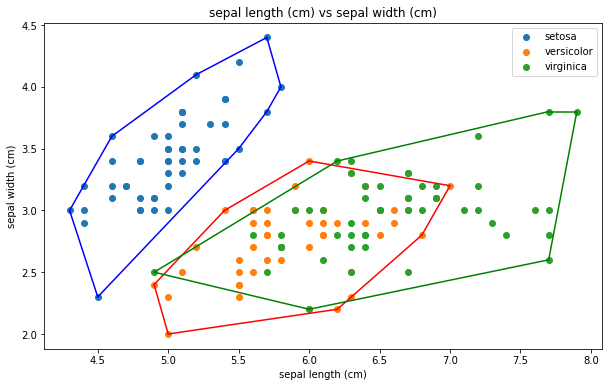

Pilihan Database : 
1. Database Iris
2. Database Wine
3. Database Breast Cancer
4. Database Digits
5. Keluar


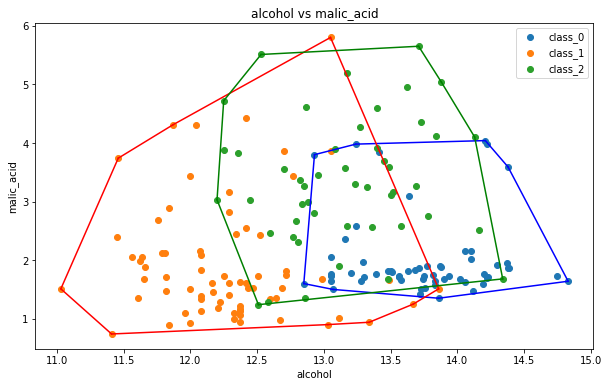

Pilihan Database : 
1. Database Iris
2. Database Wine
3. Database Breast Cancer
4. Database Digits
5. Keluar


In [9]:
if __name__ == "__main__":
    main()